# Plotting SWOT outputs (from simulation in NATL60) 

## Imports

In [1]:
# no warnings in outputs
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr # xarray missing !!!!
import cartopy.crs as ccrs # cartopy missing !!!!
import cartopy.feature as cfeature 

# imports to formate grid label
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# import beautiful colormaps for o
import cmocean # cmocean missing !!!!

# import for spectral analysis 
from scipy import signal



%matplotlib inline
 

## Load files

In [100]:
# --- Read SSH fields --- #
# set path and directories
pathdata = '/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/'
 

nmonths=16   
timesh1=[]
ilabel=[]
ilabelname=[]
itime=0
for imonths in range(nmonths):
    # filename
    if imonths+6<13:
        filename1 = 'NATL60-CJM165_y2012m'+np.str('{:02d}'.format(imonths+6))+'.1d.SSH.nc' # SSH field
    else: 
        filename1 = 'NATL60-CJM165_y2013m'+np.str('{:02d}'.format(imonths+6-12))+'.1d.SSH.nc' # SSH field
    
    ''.join([pathdata, filename1])

    # read file with xarray
    ds1 = xr.open_dataset(''.join([pathdata, filename1])) 

    # load variables
    lon1 = ds1['nav_lon'][:,:] 
    lat1 = ds1['nav_lat'][:,:] 
    ndays=np.shape(ds1['sossheig'])[0] 
    for idays in range(0,ndays): 
        ssh1 = ds1['sossheig'][idays,:,:] 
        timesh1=np.append(timesh1,np.mean(np.mean(ssh1)))  
        if idays==1 and imonths==0 or idays==15 and imonths!=0 :
            ilabel=np.append(ilabel,itime)
            if imonths+6<13:
                ilabelname=np.append(ilabelname,np.str('{:02d}'.format(imonths+6))+'/12')
            else: 
                ilabelname=np.append(ilabelname,np.str('{:02d}'.format(imonths+6-12))+'/13')
        itime=itime+1
         

## Spectral plot

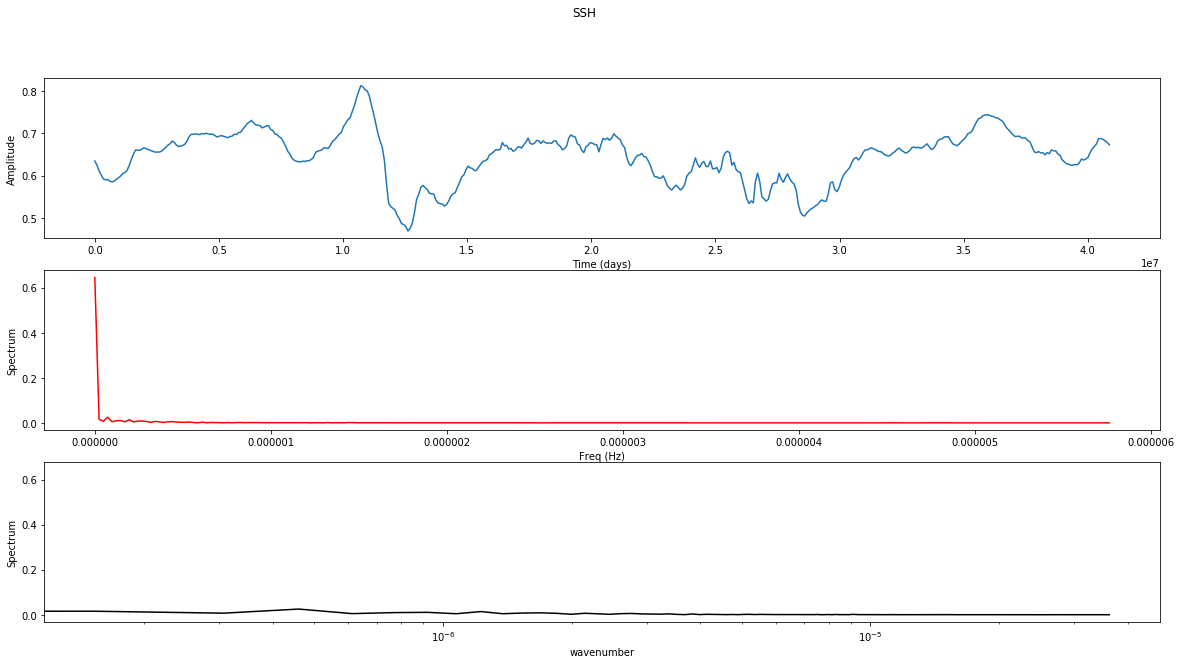

In [99]:
Fs = 1.0/(24*3600) # sampling rate: 1 every 24h
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,np.shape(timesh1)[0]*Ts,Ts) # time vector
 
y = timesh1

n = len(y) # length of the signal 
k = np.arange(n)
T = n/Fs 
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
wvnb=2*np.pi*frq

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]
 
fig = plt.figure(figsize=(20,10))
ax = fig.subplots(3, 1)
plt.suptitle('SSH')
ax[0].plot(t,y)
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Amplitude') 
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)');
ax[1].set_ylabel('Spectrum');
ax[2].semilogx(wvnb,abs(Y),'k') # plotting the spectrum
ax[2].set_xlabel('wavenumber');
ax[2].set_ylabel('Spectrum');

## Visualization

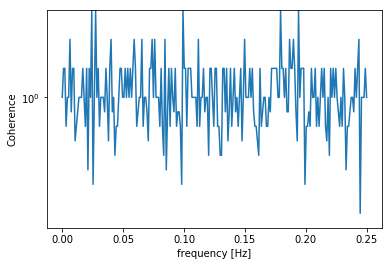

In [27]:
f, Cxy = signal.coherence(t, y, Fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

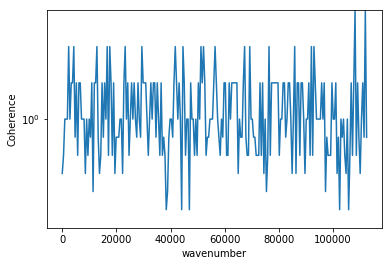

In [5]:
c=299792458
k=n*f

plt.semilogy(k, Cxy)
plt.xlabel('wavenumber')
plt.ylabel('Coherence')
plt.show()

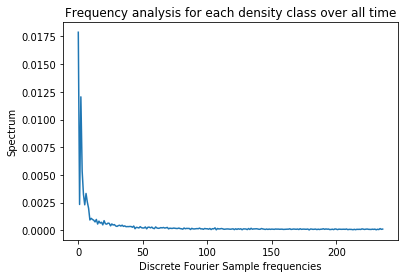

In [78]:
    ana_s = np.zeros_like(data)
    ana_f = np.zeros_like(data)
    n = len(data)
    Y = np.fft.fft(y)/n #compute and normalization
    ana_s = Y[range(int(n/2))]
    Fs=1.
    k = np.arange(0,n*T,T)
    T = n/Fs
    frq = k/T # two sides frequency range 
    frq = frq[range(int(n/2))] # one side frequency range 
    ana_f = np.fft.fftfreq(len(ana_s)) 
    plt.figure()
    plt.plot(frq,abs(ana_s))
    plt.xlabel('Discrete Fourier Sample frequencies')
    plt.ylabel('Spectrum')
    plt.title('Frequency analysis for each density class over all time')
    plt.show(block=False) 
     